# Part II - Presentation de l'analyse de Ford GoBike Dataset
## by LASNAMI Fella Souhila

## Investigation Overview


> Le but de ce travail et d'analyser les differentes variables(univariate) et la relation entre elles (bivariate et multivariate) pour tirer des conclusions.

#### Résultats obtenus:
- J'ai remarqué à travers l'analyse que les vélos de GoBike ont de fortes chances d'être utilisés pour aller travailler ou aller à l'école vu que le plus grand nombre de voyage est effectué les jours de semaines et aux alentours de 8h et 17h.

- Que certaines stations sont beaucoup plus populaires que d'autres ce qui peut etre du au nombre d'habitants à proximité de ces stations là.

- J'ai aussi remarqué qu'il n'y a aucun client qui soit inscrit au programme, c'est à dire qu'il y a une relation directe entre les non inscrits et le types d'utilisateur client (peut etre que l'un des criteres pour pouvoir s'inscrire au programme est que l'utilisateur soit un abonné)

- J'ai remarqué que les plus longs trajets sont effectués à 3 heures du matin meme si leur nombre est trés bas, et que les longs trajets sont effectués par des clients( des non inscrits) et par des personnes de moins de 50 ans, mais que la moyenne de la durée des trajets est plus élevés chez les personnes entre 50 et 70 ans

## Dataset Overview

>  Le dataset sur lequel j'ai travaillé intitulé Ford Gobike Dataset contient des informations sur les voyages effectués avec les vélo de Ford GoBike durant le mois de fevrier 2019 à San Francisco.Il contient 183412 lignes representant des voyages avec plusiseurs attributs concernant les utilisateurs (tels que leur année de naissance, leurs type(abonné ou client), leur sexe ou s'ils sont inscrits au programme bike share for all trip qui vise à aider les personnes qui remplissent quelques critéres à utiliser les vélos en payant moins), ou concernant le voyage en lui meme (les stations de départ et d'arrivée , la durée et la date du voyage) 



In [43]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [44]:
# load in the dataset into a pandas dataframe
df=pd.read_csv('fordgobike_clean.csv')

## L'utilisation des vélos de GoBike selon le jour et l'heure

> En dessinant un bar chart du nombre de départs selon le jour et l'heure on peut constater qu'un **grand** nombre de trajet est effectué **les jours de semaine**, et aux alentours de **8h et 17h** ce qui peut nous mener à penser que les vélos de gobike sont considérés comme moyen de transport pour se rendre au travail ou à l'école pour beaucoup d'habitants de San Francisco


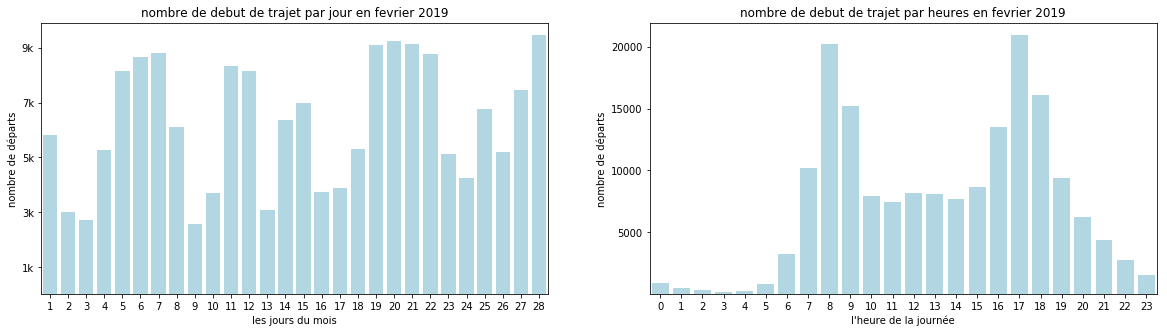

In [45]:
plt.figure(figsize=[20,5])
# afficher les nombre de départs selon les jours du mois
plt.subplot(1,2,1)
sb.countplot(data=df,x='start_day',color="#abdaeb");
plt.yticks([1000,3000,5000,7000,9000],['1k','3k','5k','7k','9k'])
plt.title('nombre de debut de trajet par jour en fevrier 2019');
plt.xlabel('les jours du mois');
plt.ylabel('nombre de départs');

# afficher les nombre de départs selon les heures du jour
plt.subplot(1,2,2)
sb.countplot(data=df,x='start_hour',color="#abdaeb");
plt.yticks([5000,10000,15000,20000],['5000','10000','15000','20000'])
plt.title('nombre de debut de trajet par heures en fevrier 2019');
plt.xlabel('l\'heure de la journée');
plt.ylabel('nombre de départs');

## Les stations avec le plus grand nombre de départs et d'arrivées
>Un barchart des stations avec le plus grand nombre de départs et d'arrivées nous permet de voir que les memes stations qui font partie du top 15 au départ sont celles du top 15 des arrivées.

In [46]:
# creer une fonction pour récuperer les 15 stations les plus visitées
def get_most_visited_stations(variable):
    #grouper selon les stations et en extraire le nombre
    stations=df.groupby(variable).size().reset_index(name='nb')
    stations.head()
    #ordonner le dataframe par ordre décroissant
    sorted_stations = stations.sort_values(["nb"], ascending=False)
    #prendre les 15 plus grandes valeurs
    most_visited_stations=sorted_stations.iloc[:15,:]
    return most_visited_stations

In [ ]:
#creer un dataframe contenant le nom de la station le nombre de depart et d'arrivée dans chacune
start_stations=get_most_visited_stations('start_station_name')
end_stations=get_most_visited_stations('end_station_name')
stations=start_stations.merge(end_stations,left_on='start_station_name',right_on='end_station_name',suffixes=('_start','_end'))
stations.drop(columns=['end_station_name'],inplace=True)

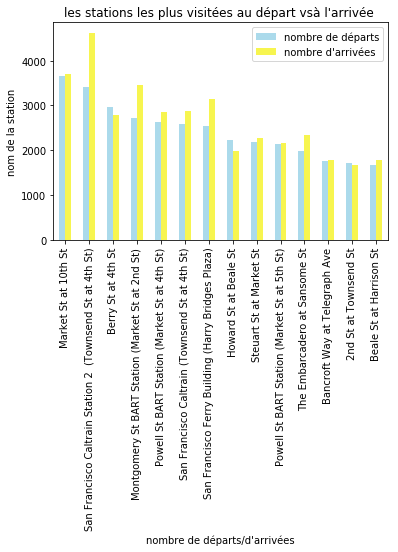

In [48]:
#afficher un barplot
colors=['#abdaeb','#f7f54f']
stations.plot(x='start_station_name', y=["nb_start", "nb_end"], kind="bar",color=colors);
plt.xlabel('nombre de départs/d\'arrivées');
plt.ylabel('nom de la station');
plt.title('les stations les plus visitées au départ vsà l\'arrivée ');
plt.legend(['nombre de départs','nombre d\'arrivées']);
           


## La durée des trajets selon l'heure de départ et le type de l'utilisateur
> Nous remarquons que les trajets les plus longs sont à 3h du matin, et ce malgré que le nombre de trajet à cette heure-ci est trés bas (visualisation 1).On remarque aussi que les clients font des trajets plus longs que les abonnés et que les jeunes aussi



In [ ]:
#creer un tableau contenant l'heure, le durée moyenne des abonnés et celle des clients
hour_type=df.groupby(['start_hour','user_type']).duration_sec.mean().to_frame(name='mean_duration').reset_index()
hour_type.head()
cust_hour=hour_type[hour_type['user_type']=='Customer'].drop(columns=['user_type'])
sub_hour=hour_type[hour_type['user_type']=='Subscriber'].drop(columns=['user_type'])
data=sub_hour.merge(cust_hour,on='start_hour',suffixes=('_sub','_cust'))

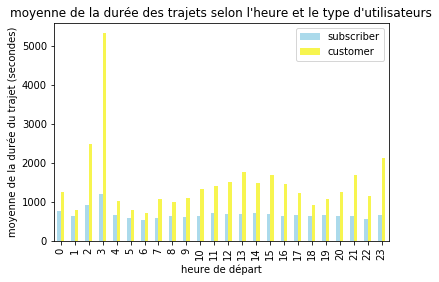

In [50]:
#afficher le barplot
data.plot(x='start_hour', y=["mean_duration_sub", "mean_duration_cust"], kind="bar",color=colors);
plt.xlabel('heure de départ');
plt.ylabel('moyenne de la durée du trajet (secondes)');
plt.title('moyenne de la durée des trajets selon l\'heure et le type d\'utilisateurs');
plt.legend(['subscriber','customer']);

## La durée des trajets selon l'age
> Nous remarquons dans le graphe de gauche que la moyenne des durées des trajets la plus élevée est celle des personnes agées entre 50 et 70 ans.Mais dans le graphe de droite que les trajets les plus longs sont effectués par des personnes de moins de 50 ans, ces trajets qui atteignent les 80000 secondes (22 heures)

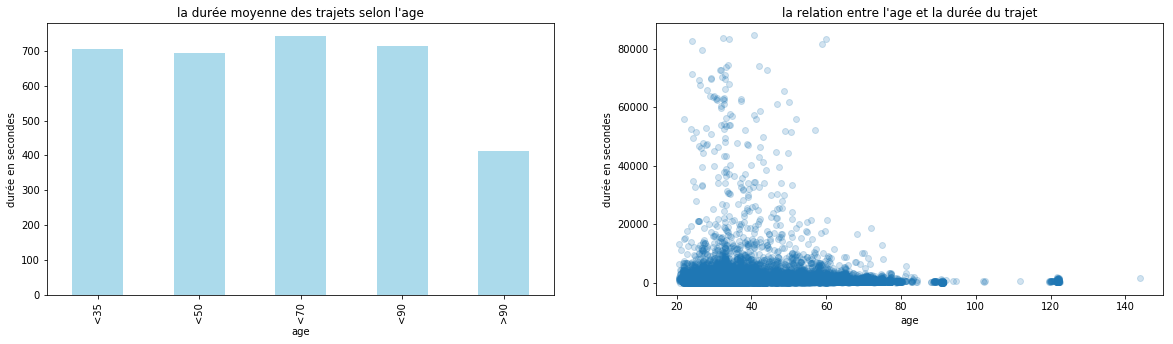

In [65]:
plt.figure(figsize=[20,5])
#afficher la moyenne des durée par tranche d'age
plt.subplot(1,2,1)
df["age_intervals"] = pd.cut(df["member_age"], bins=[0,35,50,70,90,140],include_lowest=True,labels=['<35','<50','<70','<90','>90'])
df.groupby(by="age_intervals")["duration_sec"].mean().plot(kind='bar',color="#abdaeb");
plt.xlabel('age');
plt.ylabel('durée en secondes'),
plt.title('la durée moyenne des trajets selon l\'age');

#afficher la relation entre l'age et la durée
plt.subplot(1,2,2)
sb.regplot(data=df,x='member_age',y='duration_sec',fit_reg=False,x_jitter=0.4, scatter_kws={'alpha':0.2});
plt.title('la relation entre l\'age et la durée du trajet');
plt.ylabel('durée en secondes');
plt.xlabel('age');


In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 434711 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 